<a href="https://colab.research.google.com/github/Pythonyatra/MagNet/blob/main/Sample_Resolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
folder = '/Users/shovitraj/Github/Python/MagNet_data'

### Calling Libraries

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys, os
%matplotlib inline

### Loading Data

In [3]:
sunspots=pd.read_csv(os.path.join(folder, "sunspots.csv"), index_col=["period", "timedelta"],)
sat_pos = pd.read_csv(os.path.join(folder, "satellite_positions.csv"), index_col=["period", "timedelta"],)
dst = pd.read_csv(os.path.join(folder, "dst_labels.csv"), index_col=["period", "timedelta"],)
solar_wind = pd.read_csv(os.path.join(folder, "solar_wind.csv"),index_col=["period", "timedelta"],)

### Function to summarize info

In [4]:
def data_info(df):
  print ("shape of the data dst_labs:", df.shape)
  print ("Null values:", df.isnull().sum())
  print ("Total null values sanity check:", df.isnull().sum().sum())
  display(df.head())

#### Function to resample all dataframes
[Resample Help](https://www.w3resource.com/pandas/series/series-resample.php)  
Have to reset index

In [5]:
def uri(df, sample_res):
    df = df.reset_index(level='period')
    df.index=pd.to_timedelta(df.index)
    return df.groupby('period').resample(sample_res).mean()

### Solar Wind interpolation and aggregation

In [6]:
data_info(solar_wind)

shape of the data dst_labs: (8392320, 15)
Null values: bx_gse         325888
by_gse         325888
bz_gse         325888
theta_gse      325888
phi_gse        326388
bx_gsm         325888
by_gsm         325888
bz_gsm         325888
theta_gsm      325888
phi_gsm        326388
bt             325888
density        684890
speed          689555
temperature    811768
source         316816
dtype: int64
Total null values sanity check: 6088797


bx_gse  by_gse  bz_gse  theta_gse  phi_gse  bx_gsm  \
period  timedelta                                                             
train_a 0 days 00:00:00   -5.55    3.00    1.25      11.09   153.37   -5.55   
        0 days 00:01:00   -5.58    3.16    1.17      10.10   151.91   -5.58   
        0 days 00:02:00   -5.15    3.66    0.85       7.87   146.04   -5.15   
        0 days 00:03:00   -5.20    3.68    0.68       6.17   146.17   -5.20   
        0 days 00:04:00   -5.12    3.68    0.49       4.62   145.72   -5.12   

                         by_gsm  bz_gsm  theta_gsm  phi_gsm    bt  density  \
period  timedelta                                                            
train_a 0 days 00:00:00    3.00    1.25      11.09   153.37  6.80     1.53   
        0 days 00:01:00    3.16    1.17      10.10   151.91  6.83     1.69   
        0 days 00:02:00    3.66    0.85       7.87   146.04  6.77     1.97   
        0 days 00:03:00    3.68    0.68       6.17   146.17  6.74     1.97   
        0 days 00:04:00    3.68    0.49       4.62   145.72  6.65     1.77   

                          speed  temperature source  
period  timedelta                                    
train_a 0 days 00:00:00  383.92     110237.0     ac  
        0 days 00:01:00  381.79     123825.0     ac  
        0 days 00:02:00  389.11      82548.0     ac  
        0 days 00:03:00  389.11      82548.0     ac  
        0 days 00:04:00  384.26      94269.0     ac

#### Drop unnecessary columns from the solar wind data

In [7]:
cols_to_drop= ['bx_gsm','by_gsm', 'bz_gsm', 'theta_gsm', 'phi_gsm', 'source']
solar_wind.drop(cols_to_drop, axis=1, inplace=True)


In [8]:
print ("The Null values in the data:\n", solar_wind.isnull().sum())

The Null values in the data:
 bx_gse         325888
by_gse         325888
bz_gse         325888
theta_gse      325888
phi_gse        326388
bt             325888
density        684890
speed          689555
temperature    811768
dtype: int64


In [9]:
solar_wind.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)

In [10]:
data_info(solar_wind)

shape of the data dst_labs: (8392320, 9)
Null values: bx_gse         0
by_gse         0
bz_gse         0
theta_gse      0
phi_gse        0
bt             0
density        0
speed          0
temperature    0
dtype: int64
Total null values sanity check: 0


bx_gse  by_gse  bz_gse  theta_gse  phi_gse    bt  \
period  timedelta                                                           
train_a 0 days 00:00:00   -5.55    3.00    1.25      11.09   153.37  6.80   
        0 days 00:01:00   -5.58    3.16    1.17      10.10   151.91  6.83   
        0 days 00:02:00   -5.15    3.66    0.85       7.87   146.04  6.77   
        0 days 00:03:00   -5.20    3.68    0.68       6.17   146.17  6.74   
        0 days 00:04:00   -5.12    3.68    0.49       4.62   145.72  6.65   

                         density   speed  temperature  
period  timedelta                                      
train_a 0 days 00:00:00     1.53  383.92     110237.0  
        0 days 00:01:00     1.69  381.79     123825.0  
        0 days 00:02:00     1.97  389.11      82548.0  
        0 days 00:03:00     1.97  389.11      82548.0  
        0 days 00:04:00     1.77  384.26      94269.0

In [11]:
sw_agg=uri(solar_wind, '30T')

In [12]:
data_info(sw_agg)

shape of the data dst_labs: (279744, 9)
Null values: bx_gse         0
by_gse         0
bz_gse         0
theta_gse      0
phi_gse        0
bt             0
density        0
speed          0
temperature    0
dtype: int64
Total null values sanity check: 0


bx_gse    by_gse    bz_gse  theta_gse     phi_gse  \
period  timedelta                                                              
train_a 0 days 00:00:00 -5.924667  2.342667  0.910333   7.925000  159.567333   
        0 days 00:30:00 -6.374333  0.948333  0.779000   6.282333  171.273333   
        0 days 01:00:00 -6.470333  0.367333  1.320333  10.937333  177.403333   
        0 days 01:30:00 -6.917333  1.165667  1.210000   9.429333  171.132333   
        0 days 02:00:00 -7.215000  0.885333  2.135667  15.792667  173.602333   

                               bt   density       speed   temperature  
period  timedelta                                                      
train_a 0 days 00:00:00  6.859667  1.367000  364.503167  79025.966667  
        0 days 00:30:00  7.420333  0.981333  346.053333  58734.716667  
        0 days 01:00:00  7.033000  1.002333  337.884667  78864.695238  
        0 days 01:30:00  7.536667  0.629500  322.276500  25541.754762  
        0 days 02:00:00  7.857333  1.021833  331.417833  55013.433333

### Dst interpolation and join with the Solar Wind data

In [13]:
data_info(dst)

shape of the data dst_labs: (139872, 1)
Null values: dst    0
dtype: int64
Total null values sanity check: 0


dst
period  timedelta           
train_a 0 days 00:00:00   -7
        0 days 01:00:00  -10
        0 days 02:00:00  -10
        0 days 03:00:00   -6
        0 days 04:00:00   -2

In [14]:
dst = uri(dst, '30T')

In [15]:
data_info(dst)

shape of the data dst_labs: (279741, 1)
Null values: dst    139869
dtype: int64
Total null values sanity check: 139869


dst
period  timedelta            
train_a 0 days 00:00:00  -7.0
        0 days 00:30:00   NaN
        0 days 01:00:00 -10.0
        0 days 01:30:00   NaN
        0 days 02:00:00 -10.0

In [16]:
#join sw with dst
sw_dst=sw_agg.join(dst)
sw_dst.head()

bx_gse    by_gse    bz_gse  theta_gse     phi_gse  \
period  timedelta                                                              
train_a 0 days 00:00:00 -5.924667  2.342667  0.910333   7.925000  159.567333   
        0 days 00:30:00 -6.374333  0.948333  0.779000   6.282333  171.273333   
        0 days 01:00:00 -6.470333  0.367333  1.320333  10.937333  177.403333   
        0 days 01:30:00 -6.917333  1.165667  1.210000   9.429333  171.132333   
        0 days 02:00:00 -7.215000  0.885333  2.135667  15.792667  173.602333   

                               bt   density       speed   temperature   dst  
period  timedelta                                                            
train_a 0 days 00:00:00  6.859667  1.367000  364.503167  79025.966667  -7.0  
        0 days 00:30:00  7.420333  0.981333  346.053333  58734.716667   NaN  
        0 days 01:00:00  7.033000  1.002333  337.884667  78864.695238 -10.0  
        0 days 01:30:00  7.536667  0.629500  322.276500  25541.754762   NaN  
        0 days 02:00:00  7.857333  1.021833  331.417833  55013.433333 -10.0

In [17]:
sw_dst['dst']=sw_dst[['dst']].interpolate(method='linear', limit_direction='forward', axis=0)

In [18]:
data_info(sw_dst)

shape of the data dst_labs: (279744, 10)
Null values: bx_gse         0
by_gse         0
bz_gse         0
theta_gse      0
phi_gse        0
bt             0
density        0
speed          0
temperature    0
dst            0
dtype: int64
Total null values sanity check: 0


bx_gse    by_gse    bz_gse  theta_gse     phi_gse  \
period  timedelta                                                              
train_a 0 days 00:00:00 -5.924667  2.342667  0.910333   7.925000  159.567333   
        0 days 00:30:00 -6.374333  0.948333  0.779000   6.282333  171.273333   
        0 days 01:00:00 -6.470333  0.367333  1.320333  10.937333  177.403333   
        0 days 01:30:00 -6.917333  1.165667  1.210000   9.429333  171.132333   
        0 days 02:00:00 -7.215000  0.885333  2.135667  15.792667  173.602333   

                               bt   density       speed   temperature   dst  
period  timedelta                                                            
train_a 0 days 00:00:00  6.859667  1.367000  364.503167  79025.966667  -7.0  
        0 days 00:30:00  7.420333  0.981333  346.053333  58734.716667  -8.5  
        0 days 01:00:00  7.033000  1.002333  337.884667  78864.695238 -10.0  
        0 days 01:30:00  7.536667  0.629500  322.276500  25541.754762 -10.0  
        0 days 02:00:00  7.857333  1.021833  331.417833  55013.433333 -10.0

In [19]:
print(sw_agg.shape , dst.shape, sw_dst.shape)

(279744, 9) (279741, 1) (279744, 10)


### Sunspots data interpolation and join with Solar Wind and Dst

In [20]:
data_info(sunspots)

shape of the data dst_labs: (192, 1)
Null values: smoothed_ssn    0
dtype: int64
Total null values sanity check: 0


smoothed_ssn
period  timedelta                      
train_a 0 days 00:00:00            65.4
        13 days 00:00:00           72.0
        44 days 00:00:00           76.9
        74 days 00:00:00           80.8
        105 days 00:00:00          85.4

In [21]:
sunspots = uri(sunspots, '30T')

In [22]:
data_info(sunspots)

shape of the data dst_labs: (275283, 1)
Null values: smoothed_ssn    275091
dtype: int64
Total null values sanity check: 275091


smoothed_ssn
period  timedelta                    
train_a 0 days 00:00:00          65.4
        0 days 00:30:00           NaN
        0 days 01:00:00           NaN
        0 days 01:30:00           NaN
        0 days 02:00:00           NaN

In [23]:
print(sw_agg.shape, dst.shape, sw_dst.shape, sunspots.shape)

(279744, 9) (279741, 1) (279744, 10) (275283, 1)


In [24]:
sw_dst_ss= sw_dst.join(sunspots)
 # forward fill sunspot data for the rest of the month
sw_dst_ss['smoothed_ssn'] = sw_dst_ss['smoothed_ssn'].fillna(method="ffill")
# interpolate between missing solar wind values
sw_dst_ss['smoothed_ssn']=sw_dst_ss[['smoothed_ssn']].interpolate()

In [25]:
data_info(sw_dst_ss)

shape of the data dst_labs: (279744, 11)
Null values: bx_gse          0
by_gse          0
bz_gse          0
theta_gse       0
phi_gse         0
bt              0
density         0
speed           0
temperature     0
dst             0
smoothed_ssn    0
dtype: int64
Total null values sanity check: 0


bx_gse    by_gse    bz_gse  theta_gse     phi_gse  \
period  timedelta                                                              
train_a 0 days 00:00:00 -5.924667  2.342667  0.910333   7.925000  159.567333   
        0 days 00:30:00 -6.374333  0.948333  0.779000   6.282333  171.273333   
        0 days 01:00:00 -6.470333  0.367333  1.320333  10.937333  177.403333   
        0 days 01:30:00 -6.917333  1.165667  1.210000   9.429333  171.132333   
        0 days 02:00:00 -7.215000  0.885333  2.135667  15.792667  173.602333   

                               bt   density       speed   temperature   dst  \
period  timedelta                                                             
train_a 0 days 00:00:00  6.859667  1.367000  364.503167  79025.966667  -7.0   
        0 days 00:30:00  7.420333  0.981333  346.053333  58734.716667  -8.5   
        0 days 01:00:00  7.033000  1.002333  337.884667  78864.695238 -10.0   
        0 days 01:30:00  7.536667  0.629500  322.276500  25541.754762 -10.0   
        0 days 02:00:00  7.857333  1.021833  331.417833  55013.433333 -10.0   

                         smoothed_ssn  
period  timedelta                      
train_a 0 days 00:00:00          65.4  
        0 days 00:30:00          65.4  
        0 days 01:00:00          65.4  
        0 days 01:30:00          65.4  
        0 days 02:00:00          65.4

### Satellite Position Drop Cols and Interpolation

In [27]:
data_info(sat_pos)

shape of the data dst_labs: (5828, 6)
Null values: gse_x_ace          0
gse_y_ace          0
gse_z_ace          0
gse_x_dscovr    4794
gse_y_dscovr    4794
gse_z_dscovr    4794
dtype: int64
Total null values sanity check: 14382


gse_x_ace  gse_y_ace  gse_z_ace  gse_x_dscovr  \
period  timedelta                                                  
train_a 0 days     1522376.9   143704.6   149496.7           NaN   
        1 days     1525410.9   136108.8   151034.1           NaN   
        2 days     1528484.9   128470.5   152387.7           NaN   
        3 days     1531570.3   120818.4   153561.4           NaN   
        4 days     1534633.1   113178.5   154534.6           NaN   

                   gse_y_dscovr  gse_z_dscovr  
period  timedelta                              
train_a 0 days              NaN           NaN  
        1 days              NaN           NaN  
        2 days              NaN           NaN  
        3 days              NaN           NaN  
        4 days              NaN           NaN

In [28]:
sat_pos = uri(sat_pos, '30T')

In [29]:
# drop the unnecessary columns
cols_to_drop = ['gse_x_dscovr', 'gse_y_dscovr', 'gse_z_dscovr']
sat_pos.drop(cols_to_drop, axis=1, inplace=True)

print ('Droping the columns:', cols_to_drop)
print ('remaining columns:', sat_pos.columns )
sat_pos.head()

Droping the columns: ['gse_x_dscovr', 'gse_y_dscovr', 'gse_z_dscovr']
remaining columns: Index(['gse_x_ace', 'gse_y_ace', 'gse_z_ace'], dtype='object')


gse_x_ace  gse_y_ace  gse_z_ace
period  timedelta                                       
train_a 0 days 00:00:00  1522376.9   143704.6   149496.7
        0 days 00:30:00        NaN        NaN        NaN
        0 days 01:00:00        NaN        NaN        NaN
        0 days 01:30:00        NaN        NaN        NaN
        0 days 02:00:00        NaN        NaN        NaN

In [30]:
alldata = sw_dst_ss.join(sat_pos)
alldata.head()

bx_gse    by_gse    bz_gse  theta_gse     phi_gse  \
period  timedelta                                                              
train_a 0 days 00:00:00 -5.924667  2.342667  0.910333   7.925000  159.567333   
        0 days 00:30:00 -6.374333  0.948333  0.779000   6.282333  171.273333   
        0 days 01:00:00 -6.470333  0.367333  1.320333  10.937333  177.403333   
        0 days 01:30:00 -6.917333  1.165667  1.210000   9.429333  171.132333   
        0 days 02:00:00 -7.215000  0.885333  2.135667  15.792667  173.602333   

                               bt   density       speed   temperature   dst  \
period  timedelta                                                             
train_a 0 days 00:00:00  6.859667  1.367000  364.503167  79025.966667  -7.0   
        0 days 00:30:00  7.420333  0.981333  346.053333  58734.716667  -8.5   
        0 days 01:00:00  7.033000  1.002333  337.884667  78864.695238 -10.0   
        0 days 01:30:00  7.536667  0.629500  322.276500  25541.754762 -10.0   
        0 days 02:00:00  7.857333  1.021833  331.417833  55013.433333 -10.0   

                         smoothed_ssn  gse_x_ace  gse_y_ace  gse_z_ace  
period  timedelta                                                       
train_a 0 days 00:00:00          65.4  1522376.9   143704.6   149496.7  
        0 days 00:30:00          65.4        NaN        NaN        NaN  
        0 days 01:00:00          65.4        NaN        NaN        NaN  
        0 days 01:30:00          65.4        NaN        NaN        NaN  
        0 days 02:00:00          65.4        NaN        NaN        NaN

In [31]:
cols_to_interp=['gse_x_ace', 'gse_y_ace', 'gse_z_ace']
alldata[cols_to_interp]=alldata[cols_to_interp].interpolate(method='linear', limit_direction='forward', axis=0)
alldata.head()

bx_gse    by_gse    bz_gse  theta_gse     phi_gse  \
period  timedelta                                                              
train_a 0 days 00:00:00 -5.924667  2.342667  0.910333   7.925000  159.567333   
        0 days 00:30:00 -6.374333  0.948333  0.779000   6.282333  171.273333   
        0 days 01:00:00 -6.470333  0.367333  1.320333  10.937333  177.403333   
        0 days 01:30:00 -6.917333  1.165667  1.210000   9.429333  171.132333   
        0 days 02:00:00 -7.215000  0.885333  2.135667  15.792667  173.602333   

                               bt   density       speed   temperature   dst  \
period  timedelta                                                             
train_a 0 days 00:00:00  6.859667  1.367000  364.503167  79025.966667  -7.0   
        0 days 00:30:00  7.420333  0.981333  346.053333  58734.716667  -8.5   
        0 days 01:00:00  7.033000  1.002333  337.884667  78864.695238 -10.0   
        0 days 01:30:00  7.536667  0.629500  322.276500  25541.754762 -10.0   
        0 days 02:00:00  7.857333  1.021833  331.417833  55013.433333 -10.0   

                         smoothed_ssn     gse_x_ace      gse_y_ace  \
period  timedelta                                                    
train_a 0 days 00:00:00          65.4  1.522377e+06  143704.600000   
        0 days 00:30:00          65.4  1.522440e+06  143546.354167   
        0 days 01:00:00          65.4  1.522503e+06  143388.108333   
        0 days 01:30:00          65.4  1.522567e+06  143229.862500   
        0 days 02:00:00          65.4  1.522630e+06  143071.616667   

                             gse_z_ace  
period  timedelta                       
train_a 0 days 00:00:00  149496.700000  
        0 days 00:30:00  149528.729167  
        0 days 01:00:00  149560.758333  
        0 days 01:30:00  149592.787500  
        0 days 02:00:00  149624.816667

In [32]:
data_info(alldata)

shape of the data dst_labs: (279744, 14)
Null values: bx_gse          0
by_gse          0
bz_gse          0
theta_gse       0
phi_gse         0
bt              0
density         0
speed           0
temperature     0
dst             0
smoothed_ssn    0
gse_x_ace       0
gse_y_ace       0
gse_z_ace       0
dtype: int64
Total null values sanity check: 0


bx_gse    by_gse    bz_gse  theta_gse     phi_gse  \
period  timedelta                                                              
train_a 0 days 00:00:00 -5.924667  2.342667  0.910333   7.925000  159.567333   
        0 days 00:30:00 -6.374333  0.948333  0.779000   6.282333  171.273333   
        0 days 01:00:00 -6.470333  0.367333  1.320333  10.937333  177.403333   
        0 days 01:30:00 -6.917333  1.165667  1.210000   9.429333  171.132333   
        0 days 02:00:00 -7.215000  0.885333  2.135667  15.792667  173.602333   

                               bt   density       speed   temperature   dst  \
period  timedelta                                                             
train_a 0 days 00:00:00  6.859667  1.367000  364.503167  79025.966667  -7.0   
        0 days 00:30:00  7.420333  0.981333  346.053333  58734.716667  -8.5   
        0 days 01:00:00  7.033000  1.002333  337.884667  78864.695238 -10.0   
        0 days 01:30:00  7.536667  0.629500  322.276500  25541.754762 -10.0   
        0 days 02:00:00  7.857333  1.021833  331.417833  55013.433333 -10.0   

                         smoothed_ssn     gse_x_ace      gse_y_ace  \
period  timedelta                                                    
train_a 0 days 00:00:00          65.4  1.522377e+06  143704.600000   
        0 days 00:30:00          65.4  1.522440e+06  143546.354167   
        0 days 01:00:00          65.4  1.522503e+06  143388.108333   
        0 days 01:30:00          65.4  1.522567e+06  143229.862500   
        0 days 02:00:00          65.4  1.522630e+06  143071.616667   

                             gse_z_ace  
period  timedelta                       
train_a 0 days 00:00:00  149496.700000  
        0 days 00:30:00  149528.729167  
        0 days 01:00:00  149560.758333  
        0 days 01:30:00  149592.787500  
        0 days 02:00:00  149624.816667

In [33]:
print ("shape of all:", sw_agg.shape, dst.shape,sw_dst.shape, sat_pos.shape, alldata.shape)

shape of all: (279744, 9) (279741, 1) (279744, 10) (279603, 3) (279744, 14)


In [34]:
def agg_std(final, sw, sample_res):
    cols_to_keep = ['by_gse', 'bz_gse', 'bt', 'density', 'speed']
    sw = sw[cols_to_keep]
    
    sw = sw.reset_index(level='period')
    sw.index=pd.to_timedelta(sw.index)
    sw = sw.groupby('period').resample(sample_res).std()
    
    # rename the columns for the std
    columns = [c+'_std' for c in sw.columns]
    sw.columns = columns

    df = final.join(sw)
    return df

In [35]:
df_final = agg_std(alldata, solar_wind, '30T')


In [36]:
df_to_save = df_final.reset_index(level='period')

In [37]:
data_info(df_to_save)

shape of the data dst_labs: (279744, 20)
Null values: period          0
bx_gse          0
by_gse          0
bz_gse          0
theta_gse       0
phi_gse         0
bt              0
density         0
speed           0
temperature     0
dst             0
smoothed_ssn    0
gse_x_ace       0
gse_y_ace       0
gse_z_ace       0
by_gse_std      0
bz_gse_std      0
bt_std          0
density_std     0
speed_std       0
dtype: int64
Total null values sanity check: 0


,period,bx_gse,by_gse,bz_gse,theta_gse,phi_gse,bt,density,speed,temperature,dst,smoothed_ssn,gse_x_ace,gse_y_ace,gse_z_ace,by_gse_std,bz_gse_std,bt_std,density_std,speed_std
timedelta,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,train_a,-5.924667,2.342667,0.910333,7.925000,159.567333,6.859667,1.367000,364.503167,79025.966667,-7.0,65.4,1.522377e+06,143704.600000,149496.700000,0.840020,0.572162,0.130740,0.547849,15.541244
0 days 00:30:00,train_a,-6.374333,0.948333,0.779000,6.282333,171.273333,7.420333,0.981333,346.053333,58734.716667,-8.5,65.4,1.522440e+06,143546.354167,149528.729167,1.157813,0.590063,2.252674,0.301635,6.458380
0 days 01:00:00,train_a,-6.470333,0.367333,1.320333,10.937333,177.403333,7.033000,1.002333,337.884667,78864.695238,-10.0,65.4,1.522503e+06,143388.108333,149560.758333,1.016647,0.726130,0.057304,0.776280,18.121221
0 days 01:30:00,train_a,-6.917333,1.165667,1.210000,9.429333,171.132333,7.536667,0.629500,322.276500,25541.754762,-10.0,65.4,1.522567e+06,143229.862500,149592.787500,0.557492,0.744590,0.284221,0.563681,12.154256
0 days 02:00:00,train_a,-7.215000,0.885333,2.135667,15.792667,173.602333,7.857333,1.021833,331.417833,55013.433333,-10.0,65.4,1.522630e+06,143071.616667,149624.816667,0.234605,0.209428,0.035905,0.499259,10.972320


In [39]:
df_to_save.to_csv('/Users/shovitraj/Github/Python/MagNet/data_extracted/30min.csv')

### Corr plot of extracted data

([<matplotlib.axis.YTick at 0x7fad32284e20>,
 [Text(0, 0, 'bx_gse'),
  Text(0, 1, 'by_gse'),
  Text(0, 2, 'bz_gse'),
  Text(0, 3, 'theta_gse'),
  Text(0, 4, 'phi_gse'),
  Text(0, 5, 'bt'),
  Text(0, 6, 'density'),
  Text(0, 7, 'speed'),
  Text(0, 8, 'temperature'),
  Text(0, 9, 'dst'),
  Text(0, 10, 'smoothed_ssn'),
  Text(0, 11, 'gse_x_ace'),
  Text(0, 12, 'gse_y_ace'),
  Text(0, 13, 'gse_z_ace'),
  Text(0, 14, 'by_gse_std'),
  Text(0, 15, 'bz_gse_std'),
  Text(0, 16, 'bt_std'),
  Text(0, 17, 'density_std'),
  Text(0, 18, 'speed_std')])

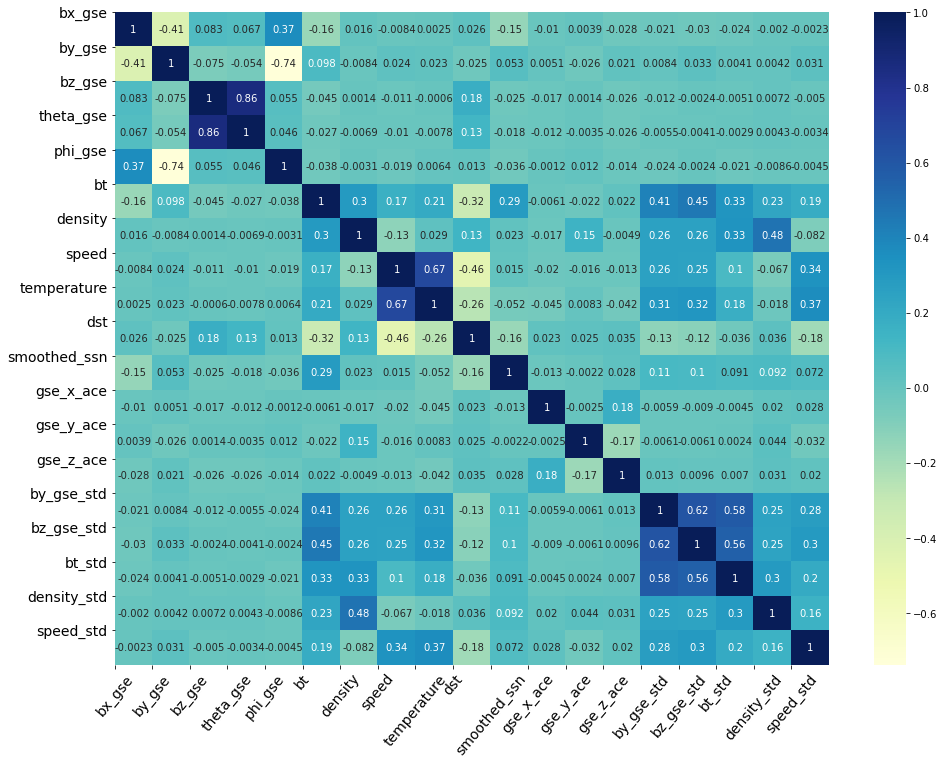

In [44]:
corr = df_to_save.corr()
f = plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.xticks(range(corr.shape[1]), corr.columns, fontsize=14, rotation=50)
plt.yticks(range(corr.shape[1]), corr.columns, fontsize=14)